#Aplicação da Rede Neural para Classificação Básica de Imagem

Treinamendo de um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas.

Base de dados: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion MNIST  contém 70.000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels).

###Preparando o ambiente

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

#Conferindo a versão do TensorFlow
print(tf.__version__)

2.5.0


###Importando o Dataset

Carregando o dataset para treinamento e teste conforme necessita para Redes Neurais.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Explorando os dados

**TREINAMENTO**

Tamanho do conjunto de treino:

In [ ]:
train_images.shape

(60000, 28, 28)

Quantidade de labels do conjunto de treinamento:

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TESTE**

Tamanho do conjunto de teste:

In [ ]:
test_labels.shape

(10000,)

Quantidade de labels do conjunto de teste:

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

###Pré-processamento de dados

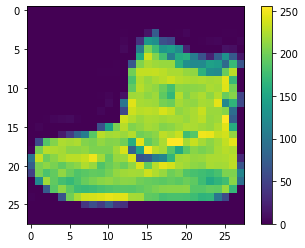

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Como apresentado acima, as imagens possuem pixels de 0 e 255.

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para checar se os dados estão no formato correto para construir e treinar as redes neurais, é necessário checar.

Logo, abaixo, é analisado as primeiras 25 imagens do Dataset.

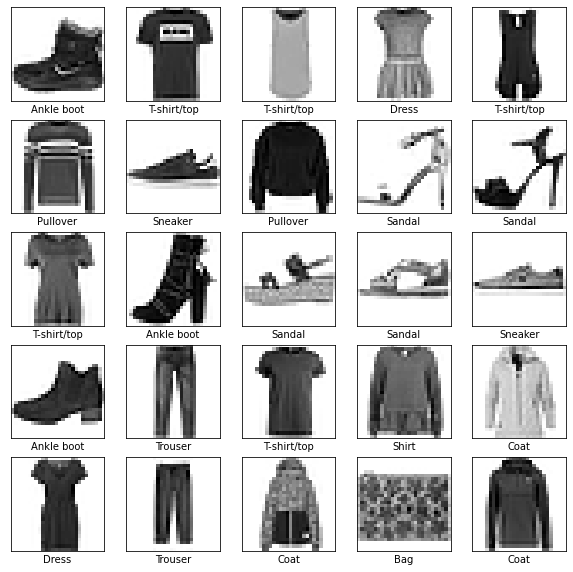

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###Construindo o modelo

Para construir uma rede neural, requer configurar as camadas do modelos, e depois compilar o modelo.

Para isso, utiliza-se o [Keras](https://www.tensorflow.org/guide/keras) (disponível no TensorFlow 2).



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (de 28 por 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels).

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais **densely connected**, ou **fully connected**.

A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

###Compilando o modelo:


* *Função Loss* — Essa mede quão precisa o modelo é durante o treinamento. Minimizar a função para *guiar* o modelo para a direção certa.

* *Optimizer* — É como o modelo se atualiza com base no dado que ele vê e sua função *loss*.

* *Métricas* — Usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

A **otimização de Adam** é um método de descida gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.

De acordo com Kingma et al., 2014 , o método é " computacionalmente eficiente, tem pouca necessidade de memória, invariante para redimensionamento diagonal de gradientes e é adequado para problemas que são grandes em termos de dados / parâmetros ".

Saiba mais sobre Keras [AQUI](https://keras.io/)

###Treinando o modelo

Treinando o Modelo em **10** epochs.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5009 - accuracy: 0.8216
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
#Conferindo a acurácia do treinamento
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAcurácia: ', test_acc )

313/313 - 0s - loss: 0.3403 - accuracy: 0.8794

Acurácia:  0.8794000148773193


###Predições

Nessa parte do modelo, é colocada em ação o `test_images` e conferida o quão certo o modelo está. 
No final, será conferido se o modelo acertou o teste.

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([4.1668397e-08, 3.5980094e-10, 1.6402120e-07, 4.6594417e-09,
       5.6430590e-08, 2.0123876e-03, 4.8957594e-07, 4.7857083e-02,
       4.8869532e-07, 9.5012933e-01], dtype=float32)

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

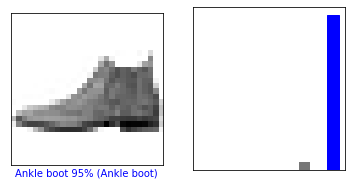

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

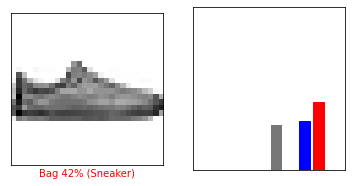

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

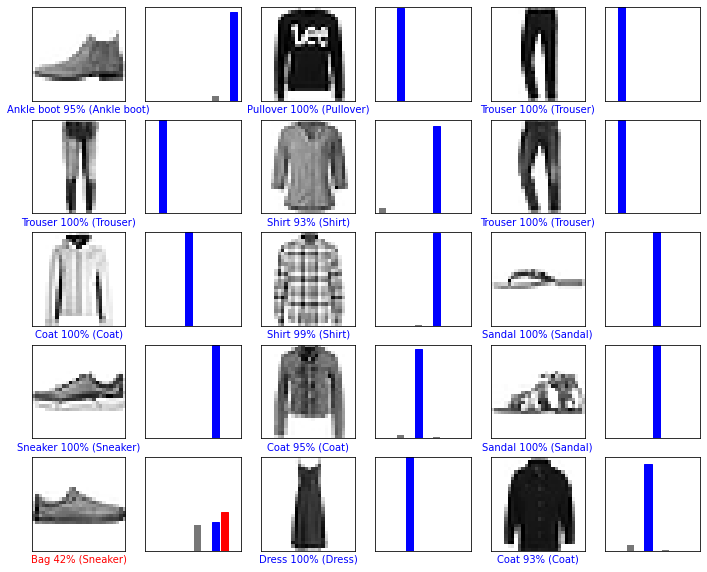

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.1668319e-08 3.5980094e-10 1.6402058e-07 4.6594240e-09 5.6430590e-08
  2.0123876e-03 4.8957503e-07 4.7857083e-02 4.8869339e-07 9.5012933e-01]]


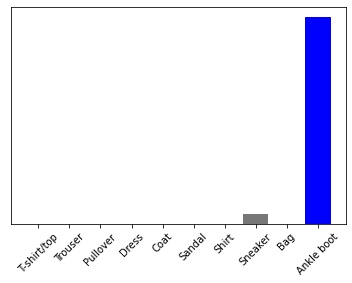

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9